In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winedataset.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
diluted wines           float64
Proline                   int64
dtype: object

In [5]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
#there is a large difference between the 75% and max in the case of magnesium ,Alcalinity of ash,Color intensity,Proanthocyanins,,Malic acid,Ash,Hue

In [9]:
#outliers

#Skewness-Proline,Malic acid

In [10]:
df.Class.unique()

array([1, 2, 3], dtype=int64)

In [11]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [12]:
#so most are present in Class 2

In [13]:
#missing variables

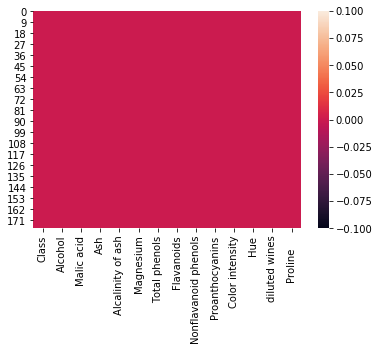

In [14]:
sns.heatmap(df.isnull())

In [15]:
#so no missing data

In [16]:
#correalation
dfcor=df.corr()
dfcor

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


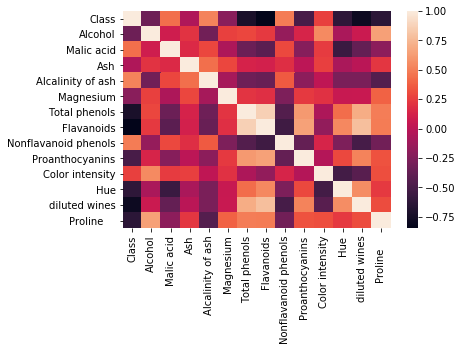

In [17]:
sns.heatmap(dfcor)

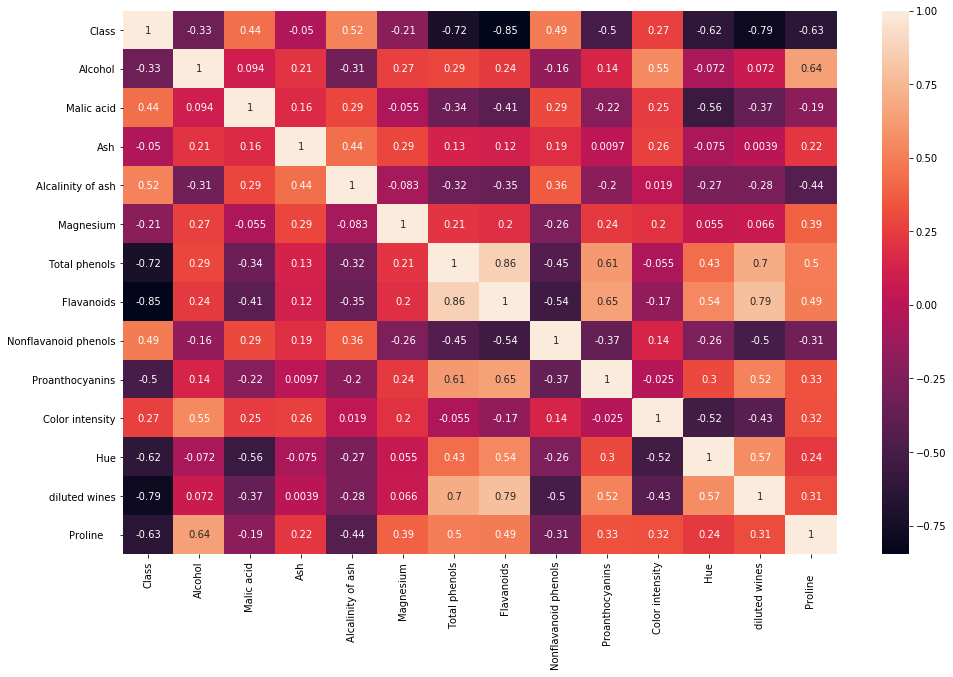

In [18]:

plt.figure(figsize=(16,10))
sns.heatmap(dfcor,annot=True)

In [19]:
#Flavanoid and diluted wines are very negatively correlated with Class
#Hue also negatively correlated and if removed does not effect much of class

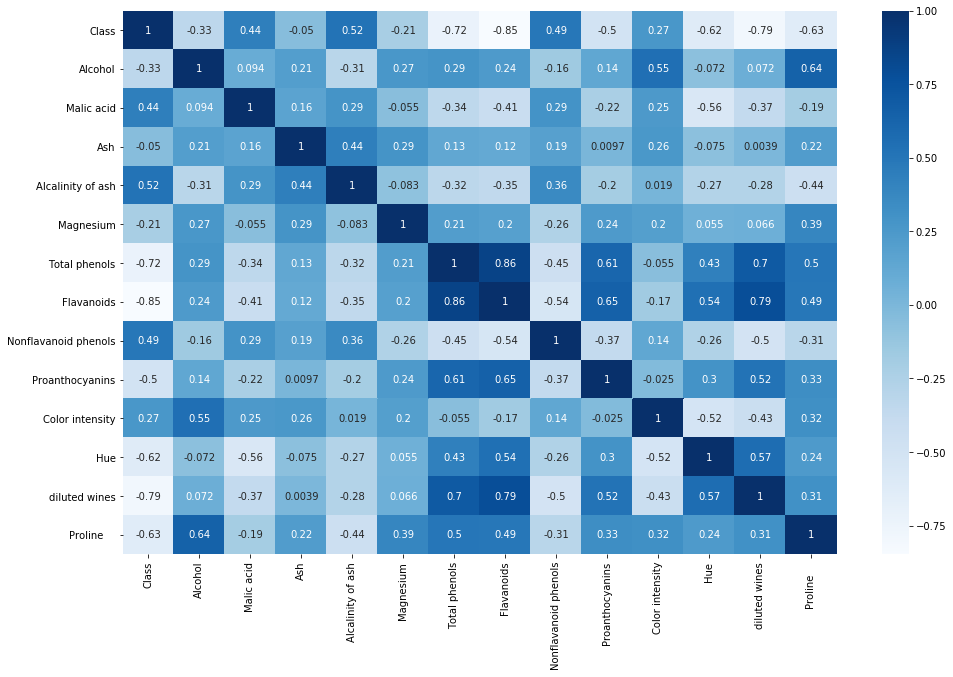

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [21]:
#we can see class has positive correlation with color intensity,Nonflavanoid phenol,alcalinity of ash,malic acid


#  positive correlation
#Class-Nonflavanoid phenol,Alcalinity of ash,Malic acid
#Alcohol-Color intensity,Proline
#Malic acid-class
#Ash-Alcalinity of ash
#alcalinity of ash-class,ash,Nonflavanoid phenol
#procathocyanins-total phenol,flavanoid,diluted wines

outliers

In [22]:
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines',
       'Proline    '],
      dtype='object')

In [23]:
#there is a large difference between the 75% and max in the case of magnesium ,Alcalinity of ash,Color intensity,,Malic acid,

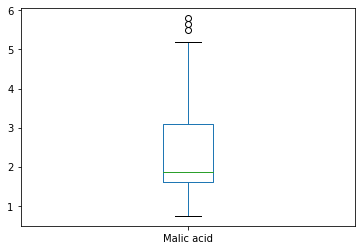

In [24]:
df['Malic acid'].plot.box()

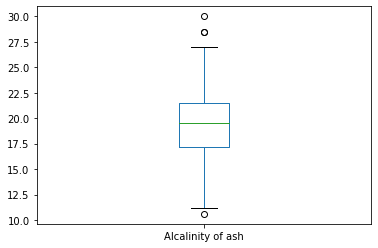

In [25]:
df['Alcalinity of ash'].plot.box()

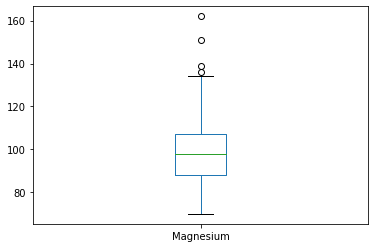

In [26]:
df['Magnesium'].plot.box()

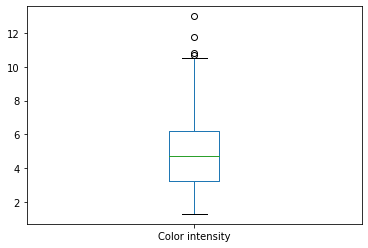

In [27]:
df['Color intensity'].plot.box()

In [28]:
df.shape

(178, 14)

In [29]:
collist=df.columns.values
ncol=14
nrows=14

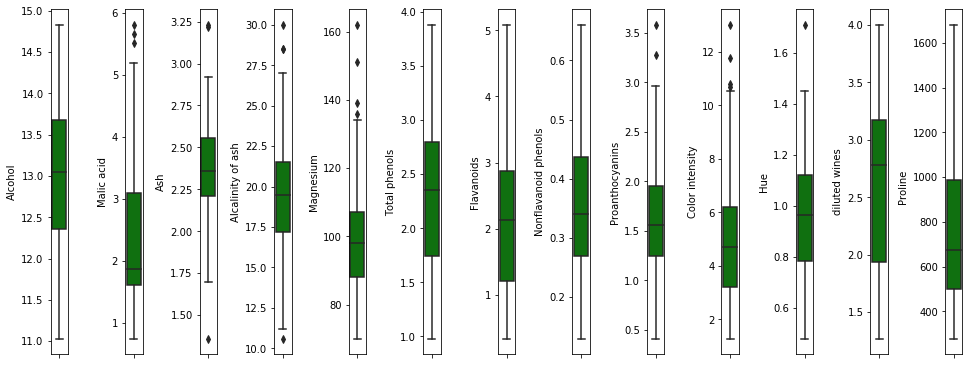

In [30]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

to check skewness

In [31]:
#lets check the skeness of the dataset
df.skew()
#if the value is mmore than 0.55 then some skewness is present

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

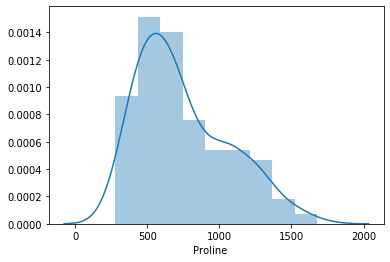

In [32]:
sns.distplot(df['Proline    '])

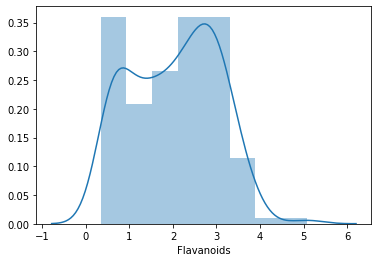

In [33]:
sns.distplot(df['Flavanoids'])

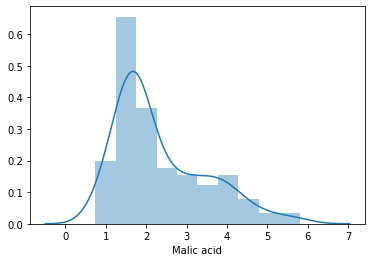

In [34]:
sns.distplot(df['Malic acid'])

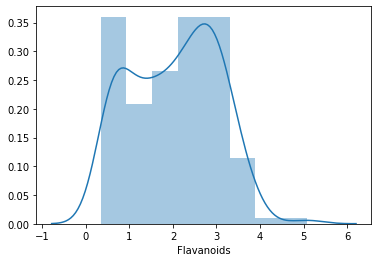

In [35]:
sns.distplot(df['Flavanoids'])

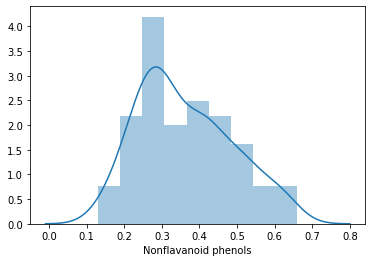

In [36]:
sns.distplot(df['Nonflavanoid phenols'])

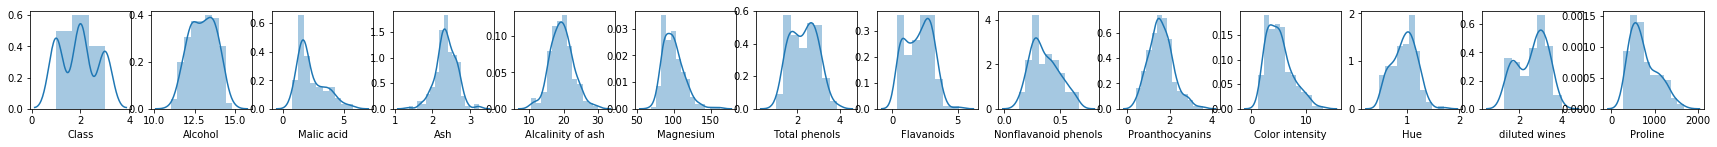

In [37]:

plt.figure(figsize=(30,30))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [66]:
#(#Treating using log)
import numpy as np
for col in df.columns:
    if df[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df[col].skew())
        if df[col].skew() > 0.55:
            df[col]=np.log1p(df[col])

column name : Alcohol and skewness is :  -0.051482331077134784
column name : Malic acid and skewness is :  0.5292217316370484
column name : Ash and skewness is :  -0.17669931645735712
column name : Alcalinity of ash and skewness is :  0.21304688642645586
column name : Magnesium and skewness is :  0.6057231291674979
column name : Total phenols and skewness is :  0.08663858640245253
column name : Flavanoids and skewness is :  0.02534355338149103
column name : Nonflavanoid phenols and skewness is :  0.4501513355621236
column name : Proanthocyanins and skewness is :  0.5171371722998975
column name : Color intensity and skewness is :  0.09722224038648299
column name : Hue and skewness is :  0.021091272199709302
column name : diluted wines and skewness is :  -0.30728549895848106
column name : Proline     and skewness is :  0.0879295192831045


In [67]:
df.skew()

Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.527327
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

In [68]:
#bivariate analysis
plt.scatter(df['Hue'],df['Class'])

KeyError: 'Class'

In [ ]:
#bivariate analysis
plt.scatter(df['Flavanoids'],df['Class'])

In [ ]:
#bivariate analysis
plt.scatter(df['diluted wines'],df['Class'])

In [ ]:
plt.scatter(df['Ash'],df['Class'])

In [ ]:
sns.pairplot(df)

In [69]:
#remove the missing values
#drop the no correlated feature/column
#remove the outliers

In [70]:
#data cleaning

In [47]:
#df.drop('Ash', axis=1,inplace=True)
#df.drop('Flavonoids', axis=1,inplace=True)
#df.drop('Alcalinity of ash', axis=1,inplace=True)
#df.drop('diluted wines', axis=1,inplace=True)

In [48]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,1,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,1,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,1,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230


In [49]:
df.shape

(178, 14)

# Removing outliers

In [50]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.21394365, 1.51861254, 0.51181037, ..., 0.36217728, 1.84791957,
        1.06404849],
       [1.21394365, 0.24628963, 0.42920147, ..., 0.40605066, 1.1134493 ,
        1.02976127],
       [1.21394365, 0.19687903, 0.1846086 , ..., 0.31830389, 0.78858745,
        1.32214312],
       ...,
       [1.37386437, 0.33275817, 1.64871201, ..., 1.61212515, 1.48544548,
        0.47601466],
       [1.37386437, 0.20923168, 0.39908488, ..., 1.56825176, 1.40069891,
        0.49044222],
       [1.37386437, 1.39508604, 1.536356  , ..., 1.52437837, 1.42894777,
        0.48914018]])

In [51]:
threshold=3
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121], dtype=int64), array([ 3,  3,  5,  4,  5,  9, 11,  3,  7], dtype=int64))


In [52]:
df_new=df[(z<3).all(axis=1)]
df_new

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,1,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,1,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,1,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.894617,2.45,20.5,4.564348,1.68,0.61,0.52,1.06,2.163323,0.64,1.74,6.608001
174,3,13.40,1.591274,2.48,23.0,4.634729,1.80,0.75,0.43,1.41,2.116256,0.70,1.56,6.621406
175,3,13.27,1.663926,2.26,20.0,4.795791,1.59,0.69,0.43,1.35,2.415914,0.59,1.56,6.728629
176,3,13.17,1.278152,2.37,20.0,4.795791,1.65,0.68,0.53,1.46,2.332144,0.60,1.62,6.734592


In [53]:
df.shape

(178, 14)

In [54]:
df_new.shape

(170, 14)

# ML process(classification)

In [55]:
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,1,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,1,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,1,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,1.894617,2.45,20.5,4.564348,1.68,0.61,0.52,1.06,2.163323,0.64,1.74,6.608001
174,3,13.40,1.591274,2.48,23.0,4.634729,1.80,0.75,0.43,1.41,2.116256,0.70,1.56,6.621406
175,3,13.27,1.663926,2.26,20.0,4.795791,1.59,0.69,0.43,1.35,2.415914,0.59,1.56,6.728629
176,3,13.17,1.278152,2.37,20.0,4.795791,1.65,0.68,0.53,1.46,2.332144,0.60,1.62,6.734592


In [56]:
#now selecting target variable
y=df_new['Class']
df.drop(['Class'],axis=1, inplace=True)
x=np.array(df_new)
print(x.shape)

(170, 14)


In [57]:
#preprocessing the data
#we need to feature scale for using knn classifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(x)
newx=scaler.transform(x)
print(newx)

[[-1.19522861  1.50053916 -0.53311254 ...  0.41746672  1.86240588
   1.04724299]
 [-1.19522861  0.20066083 -0.45068663 ...  0.46268741  1.13104486
   1.01328257]
 [-1.19522861  0.15018012  0.16176373 ...  0.37224604  0.80755825
   1.30287765]
 ...
 [ 1.34463219  0.28900208  1.62262386 ... -1.6174641  -1.45684799
   0.46481388]
 [ 1.34463219  0.1628003   0.3757649  ... -1.57224342 -1.37246018
   0.47910393]
 [ 1.34463219  1.37433738  1.51051674 ... -1.52702273 -1.40058945
  -0.49114179]]


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=50)

In [59]:
# SVM
from sklearn.svm import SVR

svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)


svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)



In [60]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.9951108702964326
0.9717295565328925
0.9907307826915622


In [61]:

#cause negative values are present

#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#mnb=MultinomialNB()
#mnb.fit(x_train,y_train)
#predmnb=mnb.predict(x_test)
#print(accuracy_score(y_test,predmnb))
#print(confusion_matrix(y_test,predmnb))
#print(classification_report(y_test,predmnb))

In [62]:
#from sklearn.model_selection import cross_val_score
#mnb=MultinomialNB()

#score=cross_val_score(mnb,x,y,cv=5)
#print(score)
#print(score.mean())
#print(score.std())

In [63]:
#so we can see kernel rbf gives the best result so no need to change the kernel ('rbf') is default
# Testing various models in one function

In [64]:
import sklearn
#from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
1.0
[[13  0  0]
 [ 0 18  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        20

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



Accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrink

In [65]:
# it shows DecisionTree works better